In [65]:
import pandas as pd
import sklearn.datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [66]:
#All functions required for manual Logistic Regression One vs All computation are defined below

In [67]:
def sigmoid(z):
    return (np.exp(z))/(1+np.exp(z))

In [68]:
def cost(A,x,theta):
    m=len(A)
    total_cost=np.zeros(len(x[0,:]))
    z=np.dot(A,theta)
    for i in range(len(x[0,:])):
        c=1-x[:,i]
        total_cost[i]=-(1/m)*(np.dot(np.transpose(x[:,i]),np.log(sigmoid(z[:,i])))+np.dot(np.transpose(c),np.log(1-sigmoid(z[:,i]))))
    return total_cost

In [69]:
enc=OneHotEncoder()
def gradient_des(A,x,theta,iter_):
    a=enc.fit_transform(x.reshape(-1,1)).toarray()
    alpha=0.01
    costm=np.zeros((iter_,len(a[0,:])))
    for j in range(iter_):
        z=np.dot(A,theta)
        for i in range(len(theta[1,:])):
            theta[:,i]=theta[:,i]-alpha*(np.dot((sigmoid(z[:,i])-a[:,i]),A))
        costm[j,:]=cost(A,a,theta)
    return theta,costm

In [70]:
def predict(A,theta):
    z=np.dot(A,theta)
    S=sigmoid(z)
    for i in range(len(S)):
        prediction=np.argmax(S)
    return prediction    

In [71]:
def score(A,y,theta):
    s=0
    for i in range(len(y)):
        if predict(A[i],theta)==y[i]:
            s=s+1
    return (s/len(y))*100            

In [72]:
a=sklearn.datasets.load_iris() #Iris Data set is loaded for this classification model. 
b=a.target_names#Output-> ['setosa','versicolor','virginica']
y=a.target#Output-> is the label encoded data 0-> 'setosa',1->'versicolor',2->'virginica'
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
e=[]
for i in range(len(y)):
    if y[i]==0:
        e.append('setosa')
    if y[i]==1:
        e.append('versicolor')
    if y[i]==2:
        e.append('virginica')
e# A categorical Array is created for the help of data visualistaion in the pandas data frame     

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [74]:
t=pd.DataFrame(e,columns=['Flower'])
df=pd.DataFrame(a.data,columns=a.feature_names)
df=pd.concat([df,t],axis=1)
D=pd.get_dummies(df.Flower)
le=LabelEncoder()
Y=le.fit_transform(df.Flower)#This manual label encoding is done to make sure original label encoded y and this Y matches or not. It maches
df#data frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
X=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
X#Input features are taken in the array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

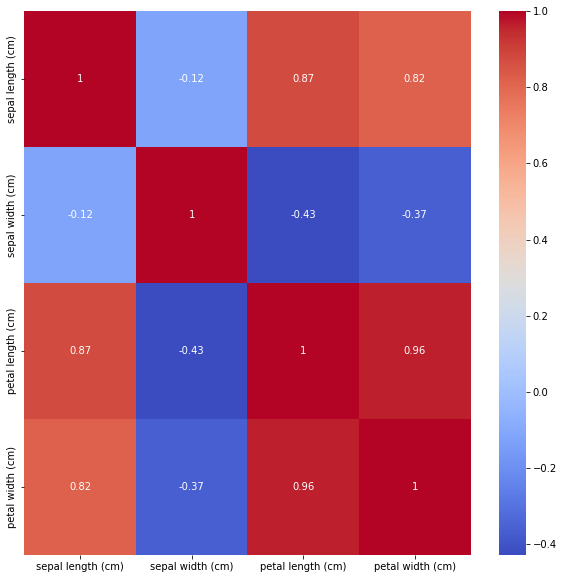

In [76]:
import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(), cmap="coolwarm",annot=True)
plt.show()#to check correlation among the features. As can be seen the features petal length and petal width are highly correlated. so we will drop one feature.

In [77]:
Norm=sklearn.preprocessing.MinMaxScaler()

In [78]:
X=Norm.fit_transform(X)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

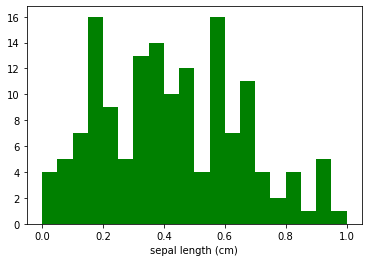

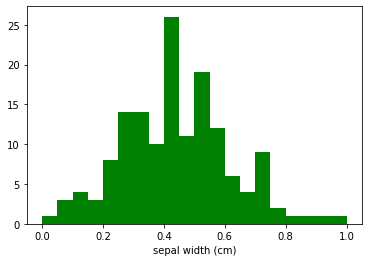

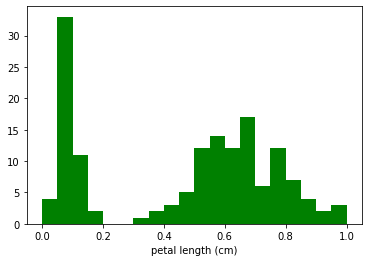

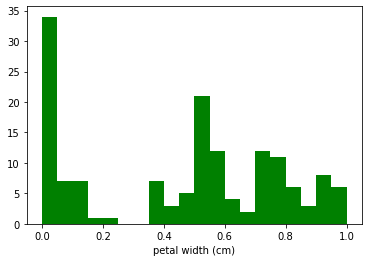

In [79]:
l=np.array(df.columns)  
for i in range(len(X[1,:])):
    plt.hist(X[:,i],bins=20,color='g')
    plt.xlabel(l[i])
    plt.show()#to check the data distribution

In [80]:
X=np.c_[np.ones(len(X)),X[:,0:3]]#Augmenting matrix with bias feature, The last feature petal width is dropped

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1)
print(X_train)

[[1.         0.44444444 0.5        0.6440678 ]
 [1.         0.30555556 0.58333333 0.11864407]
 [1.         0.63888889 0.41666667 0.57627119]
 [1.         0.08333333 0.5        0.06779661]
 [1.         0.58333333 0.33333333 0.77966102]
 [1.         0.25       0.625      0.08474576]
 [1.         0.63888889 0.375      0.61016949]
 [1.         0.5        0.41666667 0.61016949]
 [1.         0.61111111 0.41666667 0.71186441]
 [1.         0.19444444 0.58333333 0.08474576]
 [1.         0.19444444 0.         0.42372881]
 [1.         0.30555556 0.79166667 0.11864407]
 [1.         0.47222222 0.29166667 0.69491525]
 [1.         0.22222222 0.54166667 0.11864407]
 [1.         0.13888889 0.45833333 0.10169492]
 [1.         0.38888889 1.         0.08474576]
 [1.         0.13888889 0.58333333 0.15254237]
 [1.         0.77777778 0.41666667 0.83050847]
 [1.         0.33333333 0.625      0.05084746]
 [1.         0.02777778 0.41666667 0.05084746]
 [1.         0.55555556 0.125      0.57627119]
 [1.         

In [82]:
theta=np.zeros(12).reshape(4,3)
theta#Initialization of theta for gradient descent

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [83]:
Theta,costm=gradient_des(X_train,y_train,theta,10000)#10000 iterations are done

In [84]:
Theta#each column in Theta is characteristics of class. First column 0 th class, 2nd column 1th class, Third one for 2nd class

array([[  3.32027897,   2.24031379, -21.71512916],
       [ -8.39952539,   1.94353471,  -6.47749996],
       [ 11.47302598,  -7.8981694 ,  -3.19173651],
       [-20.24014288,  -1.29411795,  40.39786327]])

In [85]:
costm#Cost matrix for all with rows for each iteration and column for each class

array([[0.59855254, 0.64288339, 0.65322303],
       [0.55840282, 0.62934609, 0.63198557],
       [0.53085906, 0.62367672, 0.6155322 ],
       ...,
       [0.00179123, 0.51164872, 0.09248027],
       [0.00179108, 0.51164872, 0.09247854],
       [0.00179093, 0.51164872, 0.09247681]])

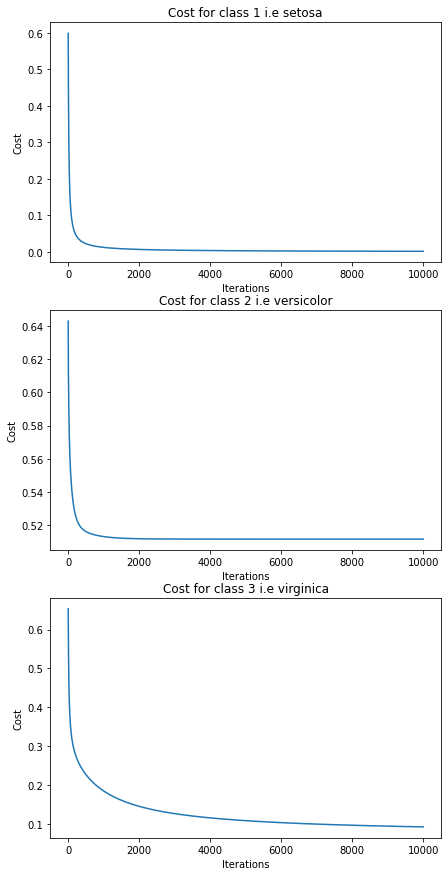

<Figure size 1440x1440 with 0 Axes>

In [86]:
fig,ax=plt.subplots(3,1,figsize=(7,15))#Verification whether the cost is decreasing or not
plt.figure(figsize=(20,20))
ax[0].plot(range(10000),costm[:,0])
ax[0].set_title("Cost for class 1 i.e setosa")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Cost")
ax[1].plot(range(10000),costm[:,1])
ax[1].set_xlabel("Iterations")
ax[1].set_title("Cost for class 2 i.e versicolor")
ax[1].set_ylabel("Cost")
ax[2].plot(range(10000),costm[:,2])
ax[2].set_xlabel("Iterations")
ax[2].set_title("Cost for class 3 i.e virginica")
ax[2].set_ylabel("Cost")
plt.show()

In [87]:
for i in range(len(y_test)):
    a=predict(X_test[i],Theta)
    if a==y_test[i]:
        print("Matched")
        if y_test[i]==0:
            print('setosa')
        if y_test[i]==1:
            print('versicolor')
        if y_test[i]==2:
            print('virginica')    
    else :
        print("Not matched")
        print(X_test[i])
        if a==0:
            print('predicted: setosa')
        if a==1:
            print('predicted: versicolor')
        if a==2:
            print('predicted: virginica')    
        print(y_test[i])#this cell is for whether the predicted and true classes matched or not. Following is the output

Matched
setosa
Matched
setosa
Matched
versicolor
Matched
virginica
Matched
virginica
Not matched
[1.         0.30555556 0.41666667 0.59322034]
predicted: virginica
1
Matched
virginica
Matched
virginica
Matched
versicolor
Matched
versicolor
Matched
versicolor
Matched
virginica
Matched
setosa
Matched
versicolor
Matched
setosa


In [88]:
score(X_test,y_test,Theta)#Checks the score for test set.

93.33333333333333

In [89]:
score(X_train,y_train,Theta)#Score for training set

97.03703703703704

In [90]:
for i in range(len(y_train)):
    a=predict(X_train[i],Theta)
    if a==y_train[i]:
        print("Matched")
        if y_train[i]==0:
            print('setosa')
        if y_train[i]==1:
            print('versicolor')
        if y_train[i]==2:
            print('virginica')    
    else :
        print("Not matched")
        print(X_train[i])
        if a==0:
            print('predicted: setosa')
        if a==1:
            print('predicted: versicolor')
        if a==2:
            print('predicted: virginica')    
        print(y_train[i])#to get where the prediction from the training set didn't match the actual from y_train. There are 6 such cases

Not matched
[1.         0.44444444 0.5        0.6440678 ]
predicted: virginica
1
Matched
setosa
Matched
versicolor
Matched
setosa
Matched
virginica
Matched
setosa
Matched
versicolor
Matched
versicolor
Matched
virginica
Matched
setosa
Matched
versicolor
Matched
setosa
Not matched
[1.         0.47222222 0.29166667 0.69491525]
predicted: virginica
1
Matched
setosa
Matched
setosa
Matched
setosa
Matched
setosa
Matched
virginica
Matched
setosa
Matched
setosa
Matched
versicolor
Matched
setosa
Matched
setosa
Matched
virginica
Matched
setosa
Matched
setosa
Matched
versicolor
Matched
setosa
Matched
setosa
Matched
virginica
Matched
virginica
Matched
setosa
Matched
virginica
Matched
setosa
Matched
setosa
Matched
versicolor
Matched
versicolor
Matched
versicolor
Matched
versicolor
Matched
setosa
Matched
versicolor
Matched
virginica
Matched
setosa
Matched
virginica
Matched
setosa
Matched
virginica
Matched
versicolor
Matched
virginica
Matched
setosa
Matched
setosa
Matched
virginica
Matched
versicolor


In [91]:
l=LogisticRegression()#To check with the inbuilt sklearn logistic regression classfier. An object is created

In [92]:
l.fit(X_train,y_train)#Model is made

LogisticRegression()

In [93]:
l.predict(X_test)#Gets the prediction

array([0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0])

In [94]:
y_test#Actual y_test sample

array([0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0])

In [95]:
a=np.zeros(len(X_test))
for i in range(len(X_test)):
    a[i]=predict(X_test[i],Theta)
a    

array([0., 0., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 0., 1., 0.])

In [96]:
l.score(X_test,y_test)#The score for sklearn logistic classifier on test set.

0.9333333333333333